In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("~/projects/us-education-datasets-unification-project/data/us-education-datasets-unification-project/states_all.csv")

In [4]:
df.shape

(1492, 25)

In [5]:
np.sqrt(df.shape[0])
df.shape[0]/50

29.84

In [6]:
df.head(5)

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  \
0  ...     57948.0     58025.0      41167.0      471564.0       196386.0   
1  ...      9748.0      8789.0       6714.0       79117.0        30847.0   
2  ...     55433.0     49081.0      37410.0      437127.0       175210.0   
3  ...     34632.0     36011.0      27651.0      281338.0       123113.0   
4  ...    418418.0    363296.0     270675.0     3286034.0      1372011.0   

   GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0      676174.0        208.327876        252.187522           207.963517   
1      112335.0               NaN               NaN                  NaN   
2      614881.0        215.253932        265.366278           206.212716   
3      405259.0        210.206028        256.312090           208.634458   
4     4717112.0        208.398961        260.892247           196.764414   

   AVG_READING_8_SCORE  
0                  NaN  
1           258.859712  
2           262.169895  
3           264.619665  
4                  NaN  

[5 rows x 25 columns]

In [7]:
df.columns.tolist()

['PRIMARY_KEY',
 'STATE',
 'YEAR',
 'ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G',
 'AVG_MATH_4_SCORE',
 'AVG_MATH_8_SCORE',
 'AVG_READING_4_SCORE',
 'AVG_READING_8_SCORE']

In [8]:
df['avg_local_revenue']=df['LOCAL_REVENUE']/df['GRADES_ALL_G']
df['avg_instruction_expenditure'] = df['INSTRUCTION_EXPENDITURE'] / df['GRADES_ALL_G']
df['fracn_schoolage'] = df['ENROLL']/ df['GRADES_ALL_G']

In [77]:
#Normalize students enrolled to fraction of enrolled population
fracn_enroll_cols = ['GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G']

for col in fracn_enroll_cols:
    df['fracn_enroll_{}'.format(col)] = df[col] / df['GRADES_ALL_G']
    print('fracn_enroll_{}'.format(col))
    df.drop(col, axis=1) 

fracn_enroll_GRADES_PK_G
fracn_enroll_GRADES_KG_G
fracn_enroll_GRADES_4_G
fracn_enroll_GRADES_8_G
fracn_enroll_GRADES_12_G
fracn_enroll_GRADES_1_8_G
fracn_enroll_GRADES_9_12_G


/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


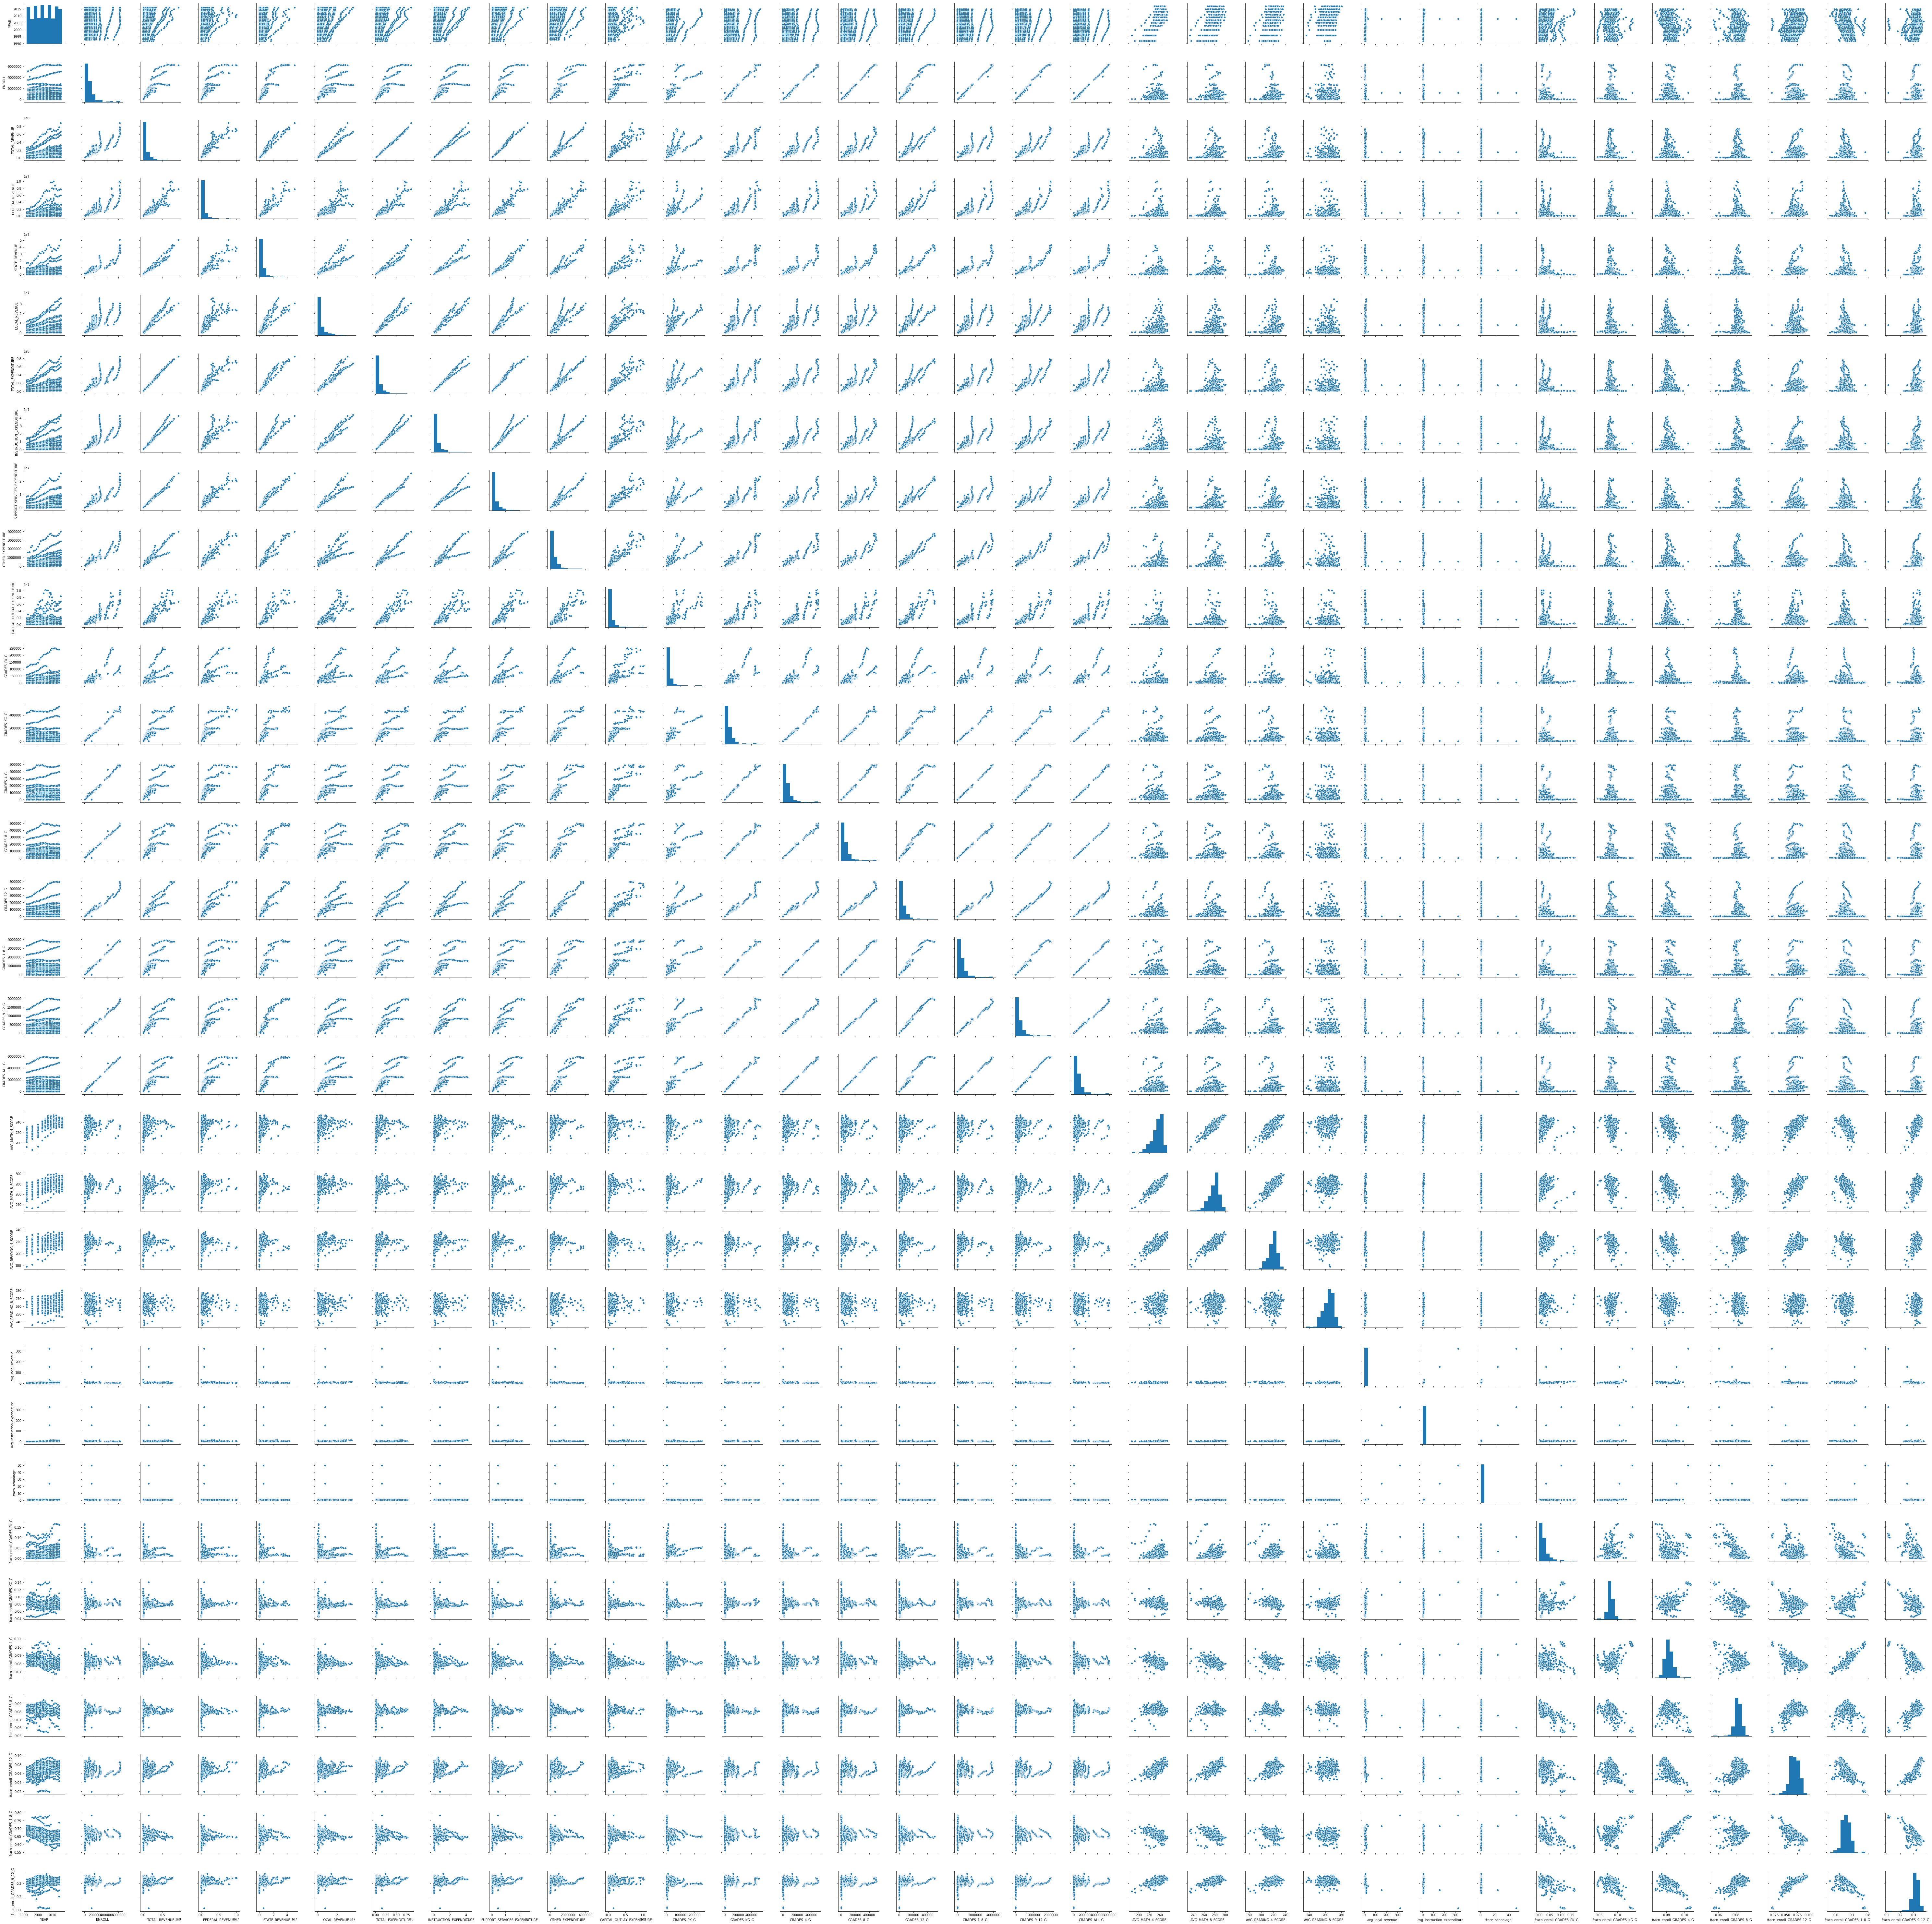

In [79]:
sns.pairplot(df, kind='scatter')

(33, 33)


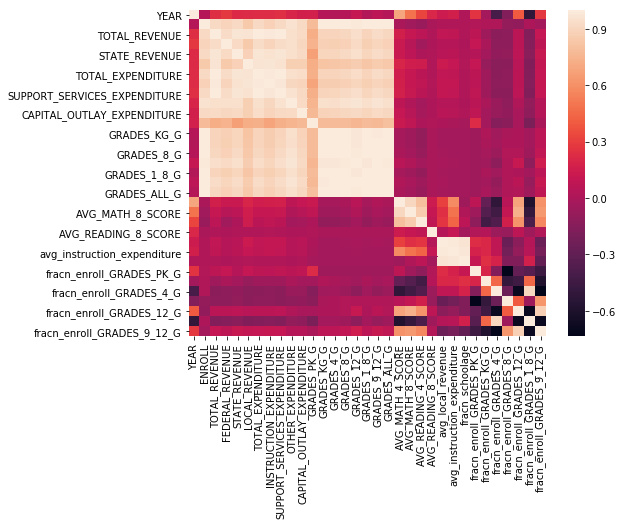

In [80]:
corr = df.corr()
print(corr.shape)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr)

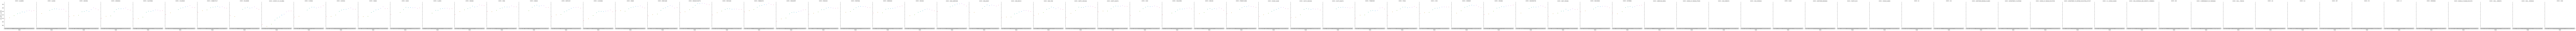

In [99]:
sns.catplot(data=df, x="YEAR", y="AVG_MATH_4_SCORE", col="STATE")
plt.show()

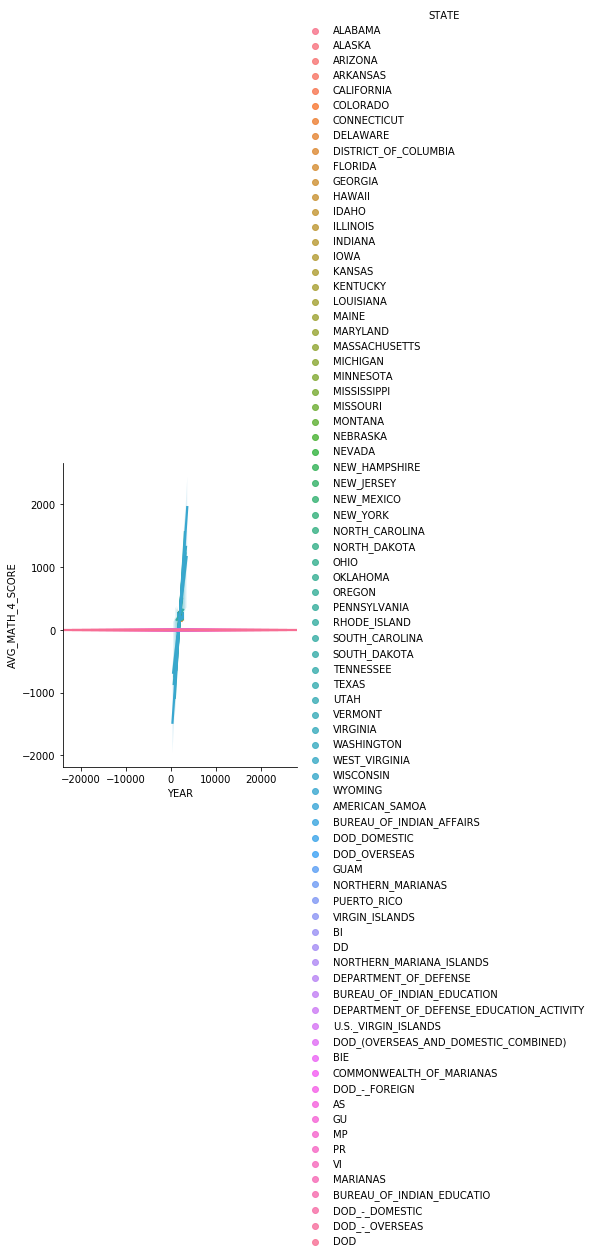

In [81]:
sns.lmplot(x="YEAR", y="AVG_MATH_4_SCORE", hue="STATE", data=df);

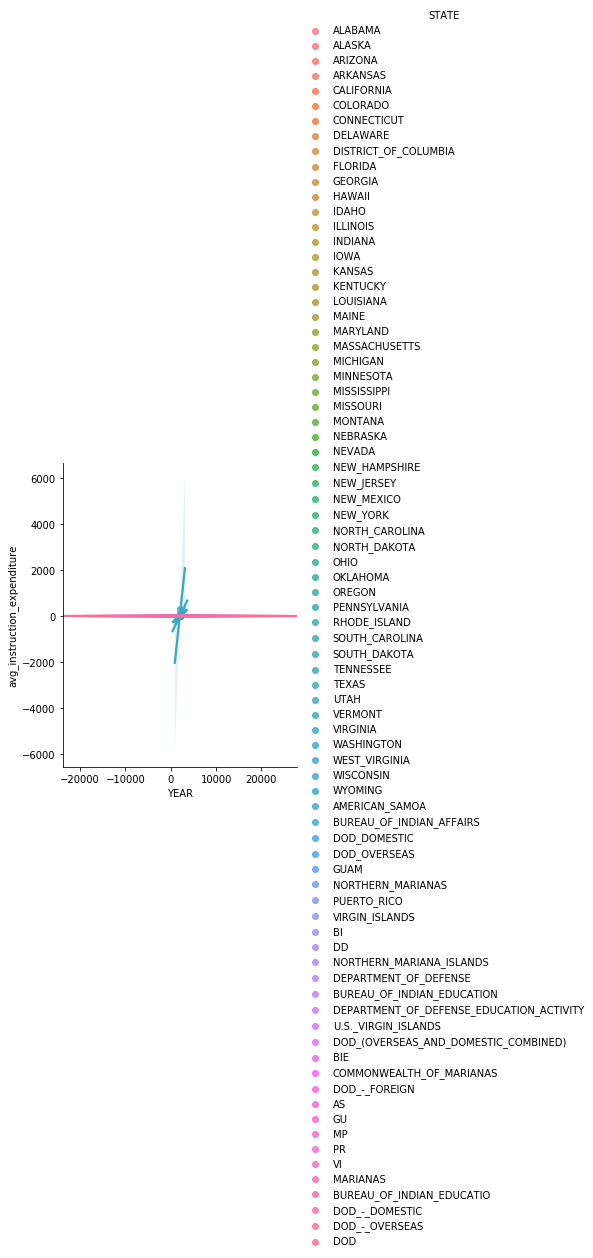

In [82]:
sns.lmplot(x="YEAR", y="avg_instruction_expenditure", hue="STATE", data=df);

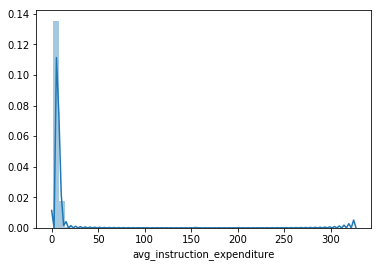

In [83]:
sns.distplot(df['avg_instruction_expenditure'].dropna())

In [125]:
df[df['avg_instruction_expenditure'] > 100]

PRIMARY_KEY     STATE  YEAR     ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
863  2008_VIRGINIA  VIRGINIA  2008  1230857.0     14768120.0         897627.0   
864  2008_VIRGINIA  VIRGINIA  2008  1230857.0     14768120.0         897627.0   

     STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
863      5957786.0      7912707.0         15236306.0                8003167.0   
864      5957786.0      7912707.0         15236306.0                8003167.0   

     ...  avg_local_revenue  avg_instruction_expenditure  fracn_schoolage  \
863  ...         154.108618                   155.870426        23.972286   
864  ...         322.257351                   325.941476        50.128574   

     fracn_enroll_GRADES_PK_G  fracn_enroll_GRADES_KG_G  \
863                  0.033129                  0.105619   
864                  0.104667                  0.140873   

     fracn_enroll_GRADES_4_G  fracn_enroll_GRADES_8_G  \
863                 0.090875                 0.075236   
864                 0.103771                 0.060479   

     fracn_enroll_GRADES_12_G  fracn_enroll_GRADES_1_8_G  \
863                  0.049372                   0.716857   
864                  0.019712                   0.783009   

     fracn_enroll_GRADES_9_12_G  
863                    0.250015  
864                    0.112324  

[2 rows x 35 columns]

(array([1.071e+03, 1.380e+02, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.30305911,   7.79582745,  14.28859578,  20.78136412,
         27.27413246,  33.76690079,  40.25966913,  46.75243747,
         53.2452058 ,  59.73797414,  66.23074247,  72.72351081,
         79.21627915,  85.70904748,  92.20181582,  98.69458416,
        105.18735249, 111.68012083, 118.17288917, 124.6656575 ,
        131.15842584, 137.65119417, 144.14396251, 150.63

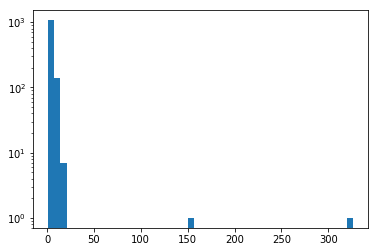

In [124]:
plt.hist('avg_instruction_expenditure', bins=50, log=True, data=df)
#df['avg_instruction_expenditure'].hist(bins=100, scale="Log")

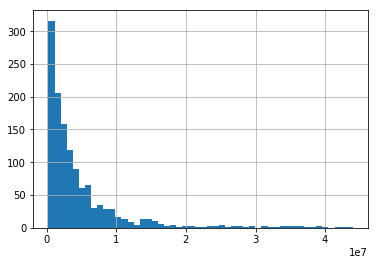

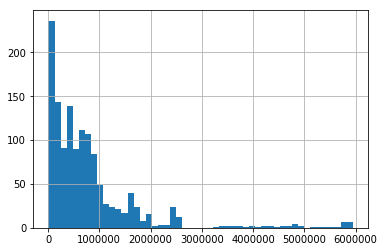

In [107]:
df['INSTRUCTION_EXPENDITURE'].hist(bins=50)
plt.show()
df['GRADES_ALL_G'].hist(bins=50)

In [108]:
df['GRADES_ALL_G'].min()

7254.0

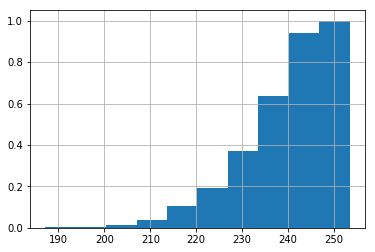

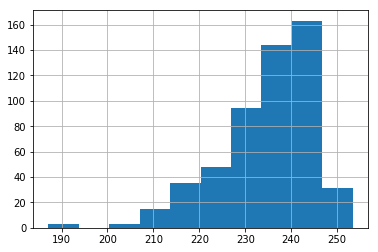

In [84]:
df['AVG_MATH_4_SCORE'].dropna().hist(density=True, cumulative=True)
plt.show()
df['AVG_MATH_4_SCORE'].dropna().hist()

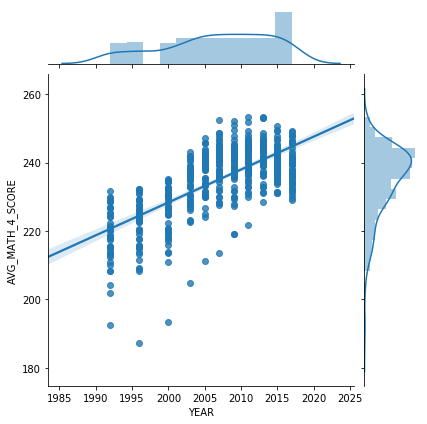

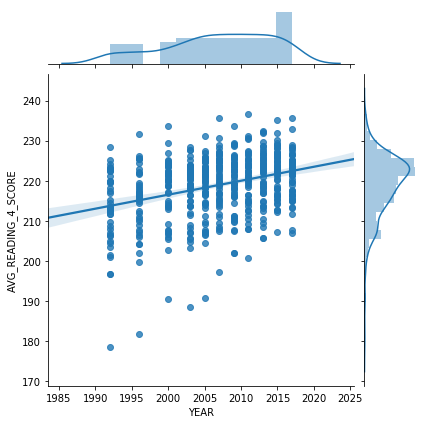

In [85]:
sns.jointplot("YEAR", "AVG_MATH_4_SCORE", data=df, kind="reg")
sns.jointplot("YEAR", "AVG_READING_4_SCORE", data=df, kind="reg")

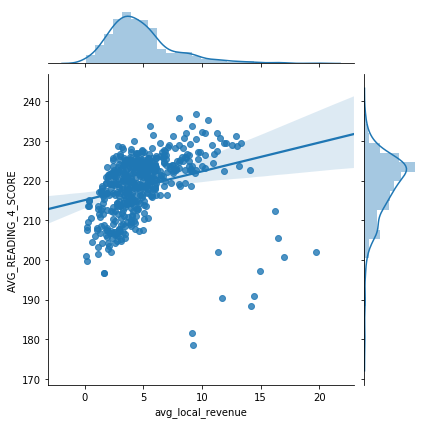

In [86]:
sns.jointplot("avg_local_revenue", "AVG_READING_4_SCORE", data=df, kind="reg")

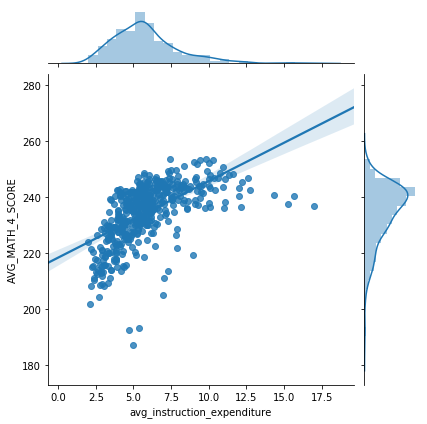

In [87]:
sns.jointplot("avg_instruction_expenditure", "AVG_MATH_4_SCORE", data=df, kind="reg")

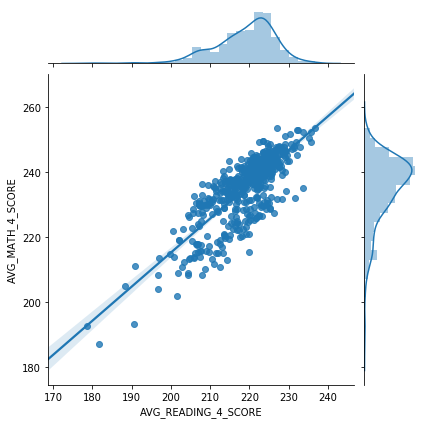

In [88]:
sns.jointplot("AVG_READING_4_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

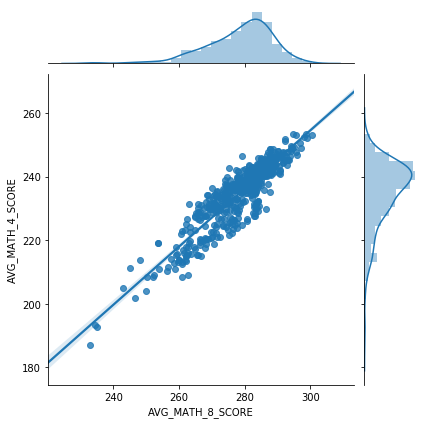

In [89]:
sns.jointplot("AVG_MATH_8_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

In [90]:
df1=df.drop(['PRIMARY_KEY','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','ENROLL'],axis=1)
df1 = df1.dropna()
df1 = pd.get_dummies(df1, columns=['STATE'])

y=df1.loc[:,'AVG_MATH_4_SCORE'].values
X=df1.drop(['AVG_MATH_4_SCORE'],axis=1).loc[:,:].values

In [91]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

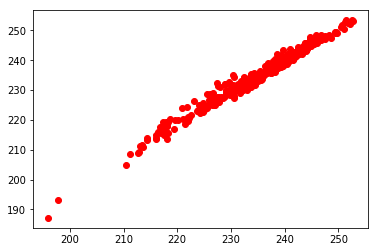

In [92]:
Y_rf=rf_model.predict(X)
plt.plot(Y_rf, y, 'ro')
plt.show()

In [93]:
feature_importances_rf = pd.DataFrame(rf_model.feature_importances_, index = df1.drop(['AVG_MATH_4_SCORE'],axis=1).columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf.head(10)

importance
YEAR                           0.407059
fracn_enroll_GRADES_12_G       0.207334
avg_instruction_expenditure    0.054708
avg_local_revenue              0.045346
fracn_schoolage                0.017671
STATE_REVENUE                  0.017526
fracn_enroll_GRADES_8_G        0.014919
fracn_enroll_GRADES_PK_G       0.013178
fracn_enroll_GRADES_KG_G       0.013178
GRADES_KG_G                    0.012949

In [94]:
feature_importances_rf.tail(10)

importance
STATE_FLORIDA         0.000042
STATE_VIRGINIA        0.000041
STATE_NORTH_DAKOTA    0.000037
STATE_IOWA            0.000028
STATE_WISCONSIN       0.000025
STATE_PENNSYLVANIA    0.000022
STATE_VERMONT         0.000019
STATE_MONTANA         0.000013
STATE_NEW_YORK        0.000005
STATE_WYOMING         0.000003

In [95]:
from sklearn import svm
svm_model = svm.SVR(gamma='scale')
svm_model.fit(X, y)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

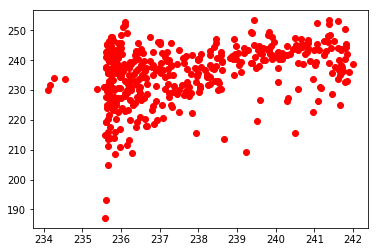

In [96]:
Y_rf=svm_model.predict(X)
plt.plot(Y_rf, y, 'ro')
plt.show()